# This notebook will cover the generation of different systems for simulation using polymers

Importing python modules
The first module to import is sw_directories so we can use the SnippetSimManage class as detailed in the first tutorial.

The second module to import is sw_build_systems so we can use the BuildAmberSystems class. This class was utilised in the second and third tutorial.

When generating a polymer array a troubleshooting issue is shown. It is possible you do not encounter this problem as it has been fixed by then, but some steps will be detailed on how to fix this issue.

In [1]:
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

# Setting up *Manager* and *Builder* classes

In [2]:
# Retrieve the path to our main directory
main_dir = os.getcwd()

# Pass this main directory to the SnippetSimManage class and assign it an appropriate variable name.
manager = SnippetSimManage(main_dir)

Now set up a 'builder' variable using the **BuildAmberSystems** class and pass the manager class to it.

In [3]:
builder = BuildAmberSystems(manager)

# 1. Building a 3x3 array of the polymer solvated in water

As with solvating a single polymers we require the base trimer and the polymer name. For a 3x3 array of 3HB decamers, it is best to ensure the files exist first.

In [4]:
# Check base trimer exists
base_trimer = manager.load_pdb_filepath("3HB_trimer")
base_trimer

'/home/dan/polymersimulator/pdb_files/3HB_trimer.pdb'

In [5]:
# Check target polymer for our system exists
polymer = manager.load_pdb_filepath("3HB_10_polymer")
polymer

'/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.pdb'

In [6]:
# Method to generate a 3x3 array of a polymer
# Example Usage: output = buidler.build_3_3_polymer_array(base_trimer_name, polymer_name)

output = builder.build_3_3_polymer_array("3HB_trimer", "3HB_10_polymer")

cd /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
3HB_3_3_array.intleap


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_3_3_array.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_3_3_array.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3 done
Loading library: /home/dan/minicon

This output variable contains two system names - one is the actual solvated polymer array, the other is the 3x3 polymer array unsolvated. The number at the end of the system names is the volume of the box.

In [7]:
# Check the output variable
output

('3HB_10_polymer_3_3_array_10', 'unsolved_3HB_10_polymer_3_3_array')

We have amber topologies and coordinates for both of these systems. Keeping the topologies and coordinates for the unsolvated polymer array may be unneccesary so you can remove them if you wish.

In [8]:
# See if amber topologies and coordinates are generated
manager.load_amber_filepaths(output[0])

('/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/3HB_10_polymer_3_3_array_10.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/3HB_10_polymer_3_3_array_10.rst7')

In [9]:
# See if amber topologies and coordinates are generated
manager.load_amber_filepaths(output[1])

('/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/unsolved_3HB_10_polymer_3_3_array.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/unsolved_3HB_10_polymer_3_3_array.rst7')

It is a good idea to check the pdb file of the final system and the unsolvated polymers too.

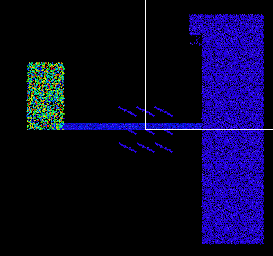

This is the final solvated system.... something has gone very wrong! :)

Lets visualise the unsolvated polymer array 

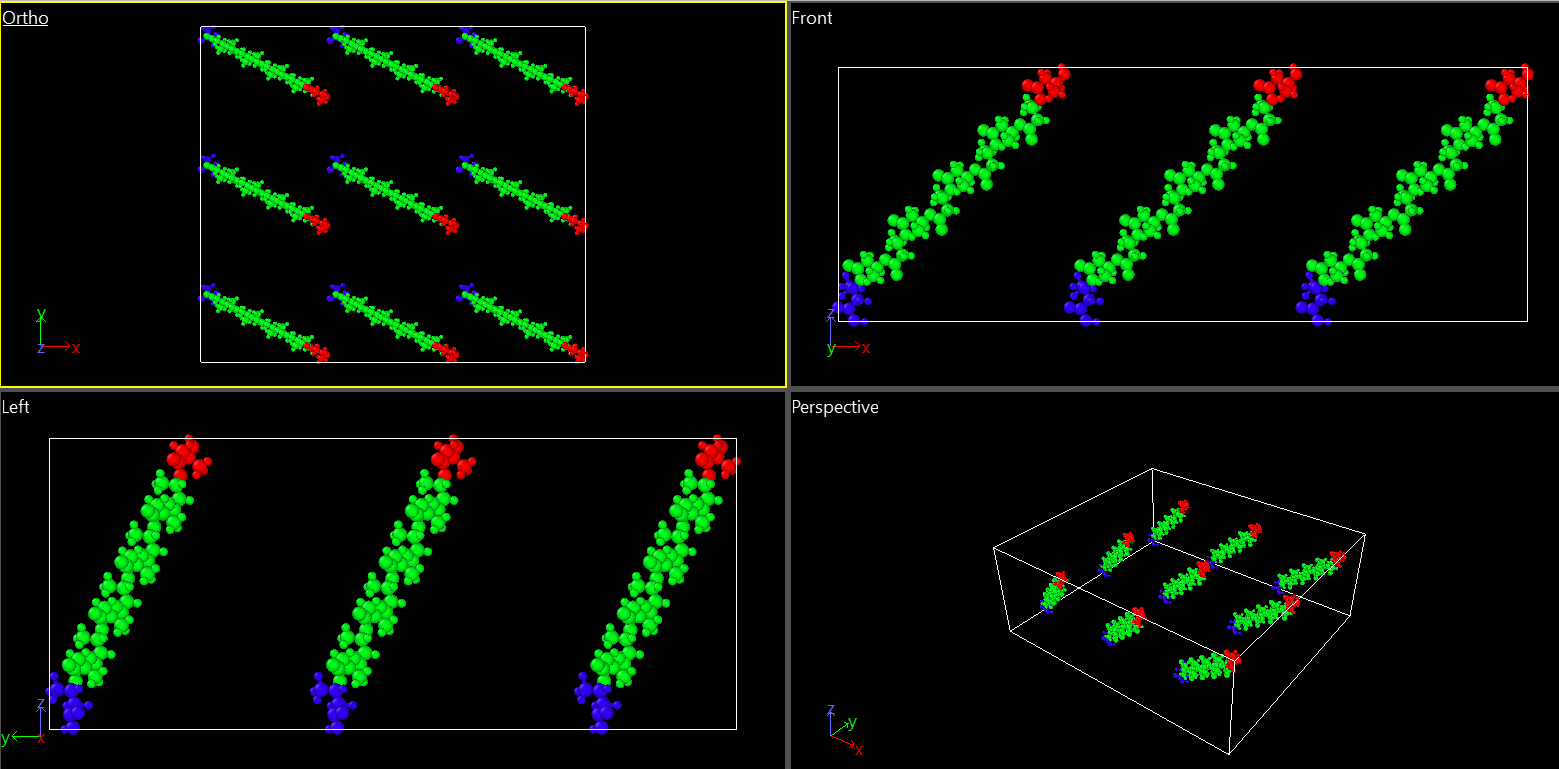

This looks good so the error must be when the system is solvated - possibly an issue with box size. This occured as there were a series of things that the code decides when generating a solvated system.

**1:** Translate distance. The polymers need to be placed a certain distance apart. This is decided by getting the maximum distance between x and y atoms in a system (we ignore z as it extends the ends of each polymers and can grow infinitely without clashing with another polymer). This value is then halved to ensure polymers aren't placed too far apart.

~~**2:** Box size **Z**. The size of the box is decided by calcualting the x,y,z of a single polymer. In z direction it just needs to be bigger than the z length of 1 polymer:~~ <br>

~~**3:** Box size **X,Y**. This is decided by being:~~

~~These values amy need to editted sometimes and can be found in the method **build_3_3_polymer_array** in the **sw_build_systems** module.~~

**2:** Box size. The issues seen above have been sorted by instead using a general buffer (as opposed to calculating the box lengths individually).

Lets build the system again.

In [10]:
# Method to generate a 3x3 array of a polymer
# Example Usage: output = buidler.build_3_3_polymer_array(base_trimer_name, polymer_name)

output = builder.build_3_3_polymer_array("3HB_trimer", "3HB_10_polymer")

cd /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
3HB_3_3_array.intleap


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_3_3_array.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_3_3_array.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3 done
Loading library: /home/dan/minicon

In [11]:
# Check the output variable - the number in the first output is the size of the buffer (in angstroms) around the polymer.
output

('3HB_10_polymer_3_3_array_10', 'unsolved_3HB_10_polymer_3_3_array')

In [12]:
# See if amber topologies and coordinates are generated
manager.load_amber_filepaths(output[0])

('/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/3HB_10_polymer_3_3_array_10.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/3HB_10_polymer_3_3_array_10.rst7')

In [13]:
# See if amber topologies and coordinates are generated
manager.load_amber_filepaths(output[1])

('/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/unsolved_3HB_10_polymer_3_3_array.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/unsolved_3HB_10_polymer_3_3_array.rst7')

Now lets visualise these systems

The final solvated system looks like this:
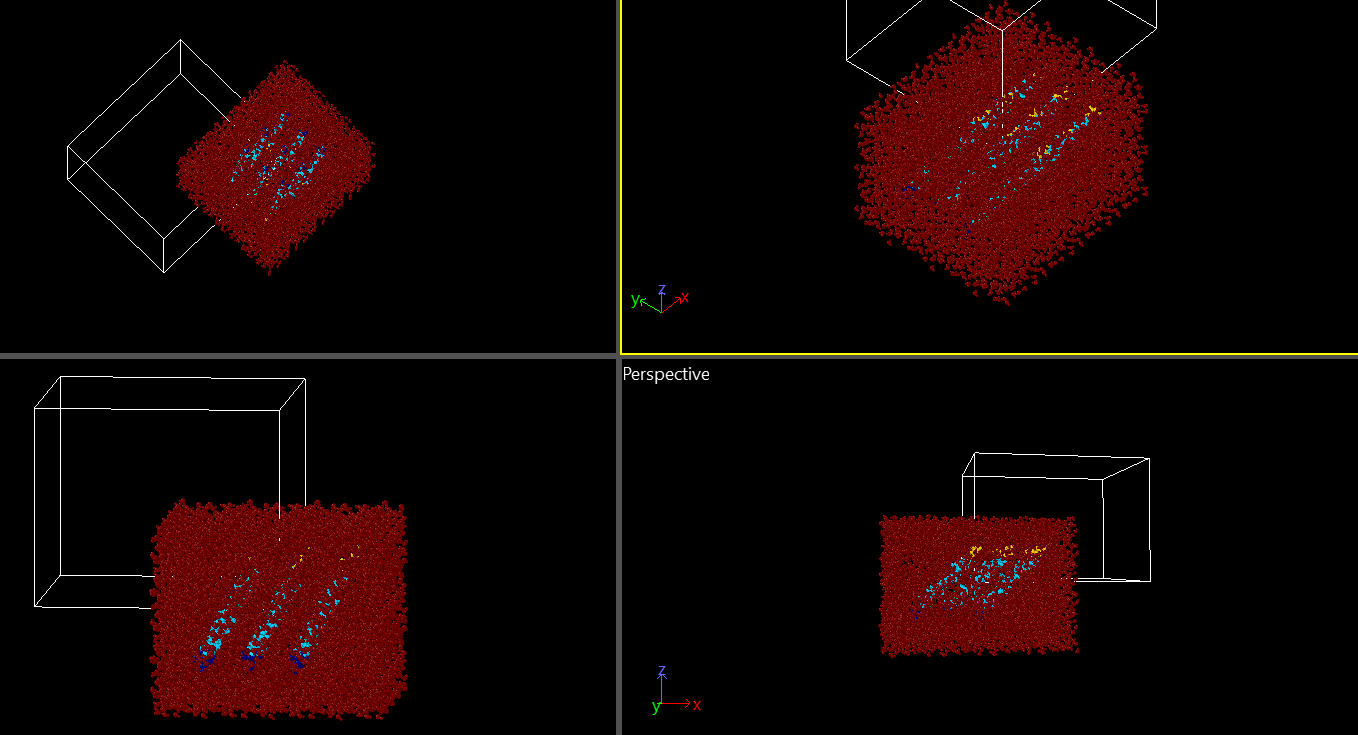

The polymers are nicely contained in a system of water. In section 1.1 using a larger, custom, buffer is explained.

The unsolvated polymer array looks like this:

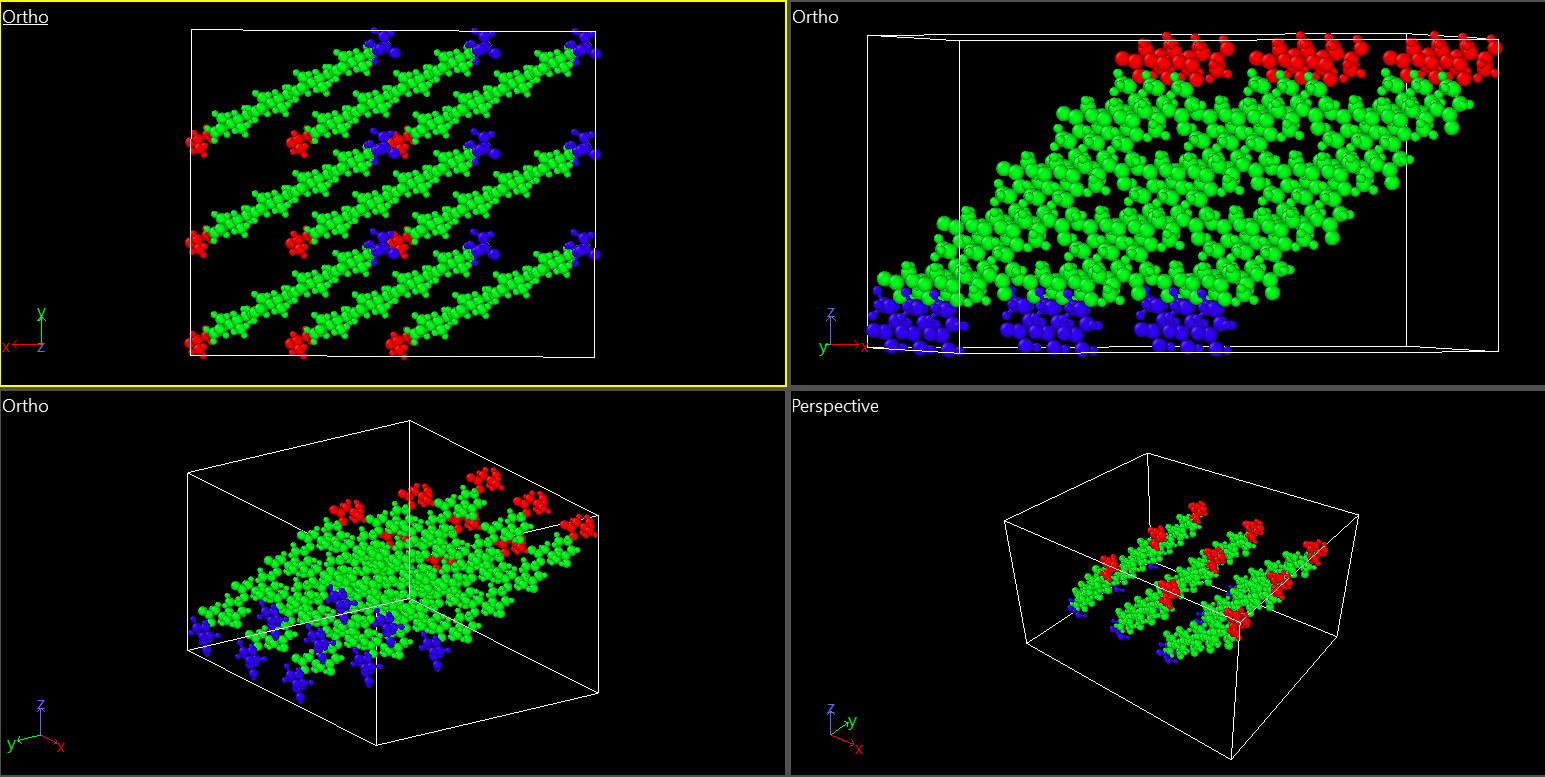

This looks good, there are no contacts between polymers so we can use this system for molecular dynamics.

# 1.1 Example workflow of generating a polymer and then a solvated system

This example workflow will show you how to go from a parameterized polymer to a system of polymers in one cell.

Steps:
1: Build polymer (for this, we will build a 3HB_12-mer)

2: Solvate the individual polymer

3: Generate the solvated polymer array with a custom buffer (25 angstroms here)

In [18]:
# Build a 3HB_12-mer
polymer = builder.gen_polymer_pdb("3HB_trimer", 12)

# Solvate the 3HB_12-mer
solvated_polymer = builder.solvate_polymer_pdb("3HB_trimer", "3HB_12_polymer")

# Generate and solvate a 3x3 array of the 3HB_12-mer
solvated_polymer_array = builder.build_3_3_polymer_array("3HB_trimer", "3HB_12_polymer", 25)


Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_12_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_12_polymer.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/Amb

*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_3_3_array.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_3_3_array.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3 done
Loading library: /home/dan/minicon

Lets have a quick look at this solvated system (the unsolvated system will look the same as above)
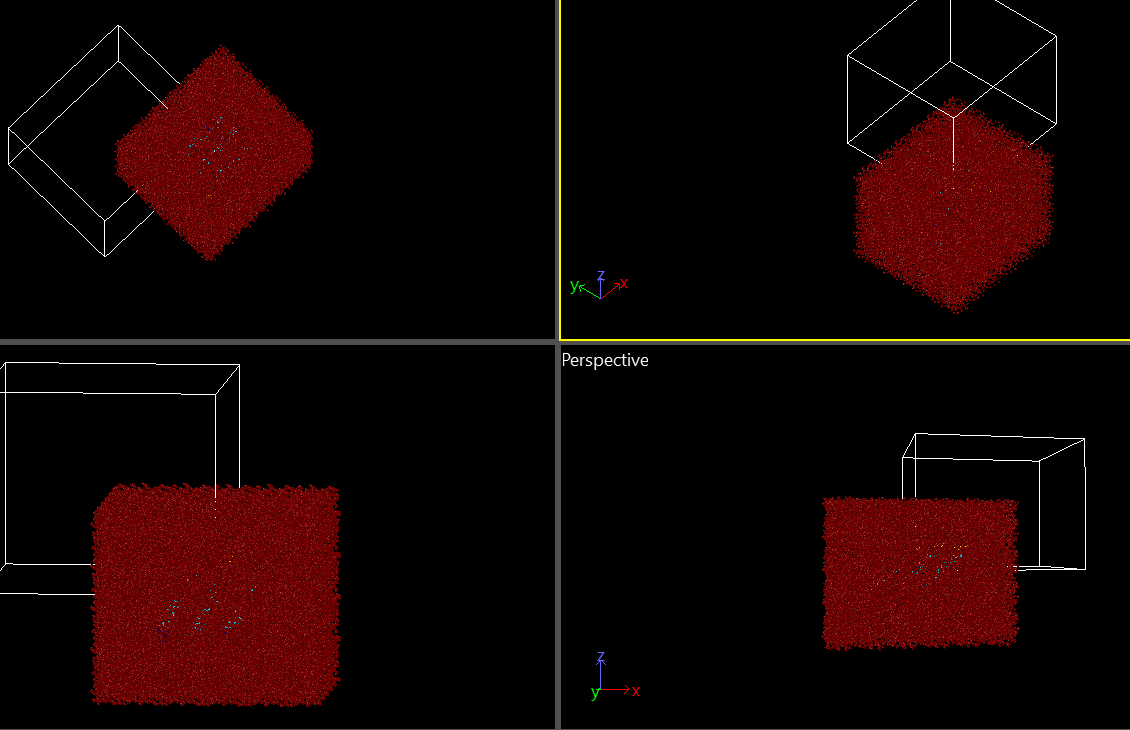

We can clearly see that there is much more water around the polymers this time.

# 2. Building a 2x10 array of the polymer solvated in water¶

There will be a future tutorial that explores different polymers that we can build systems with - i.e. chitin, cellulose and PET.
The next system to build is a 2x10 polymer array to model a surface - for this the 3HB_10_polymer will be used again.

In [15]:
# Check base trimer exists
base_trimer = manager.load_pdb_filepath("3HB_trimer")
base_trimer

'/home/dan/polymersimulator/pdb_files/3HB_trimer.pdb'

In [16]:
# Check target polymer for our system exists
polymer = manager.load_pdb_filepath("3HB_10_polymer")
polymer

'/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.pdb'

In [19]:
# Method to generate a 2x10 array of a polymer
# Example Usage: output = buidler.build_2_10_polymer_array(base_trimer_name, polymer_name, buffer) - note: the buffer is optional and the default is 10 angstroms!

output = builder.build_2_10_polymer_array("3HB_trimer", "3HB_10_polymer")

cd /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
3HB_2_10_array.intleap


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_2_10_array.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_2_10_array.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3 done
Loading library: /home/dan/minic

Let visualise the unsolvated array first:

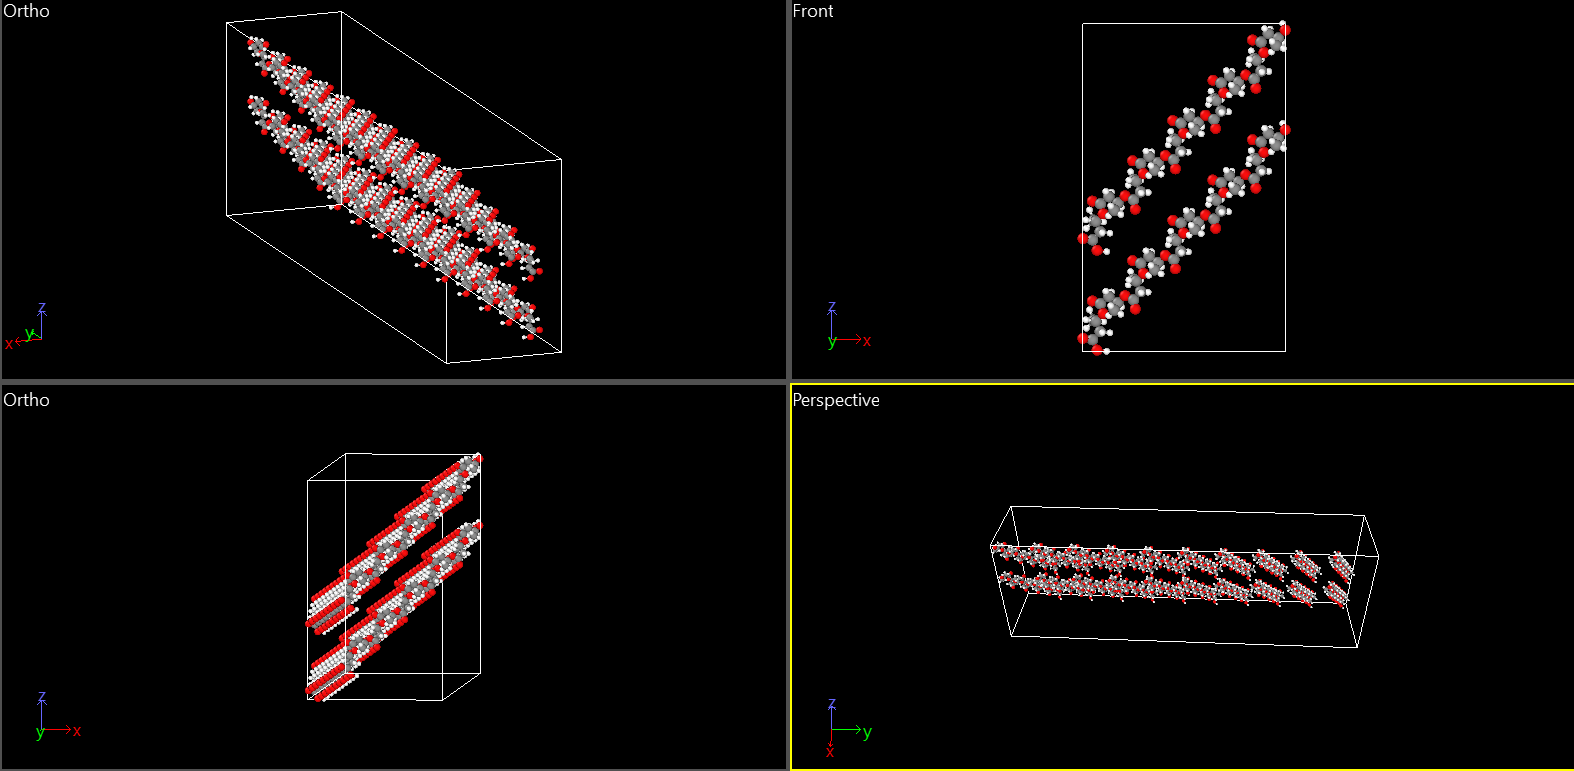

The visualisation is from a range of different angles so some of them look a bit strange, but we have 2 layers of 10 polymers!! 




Now check the solvated array of polymers.

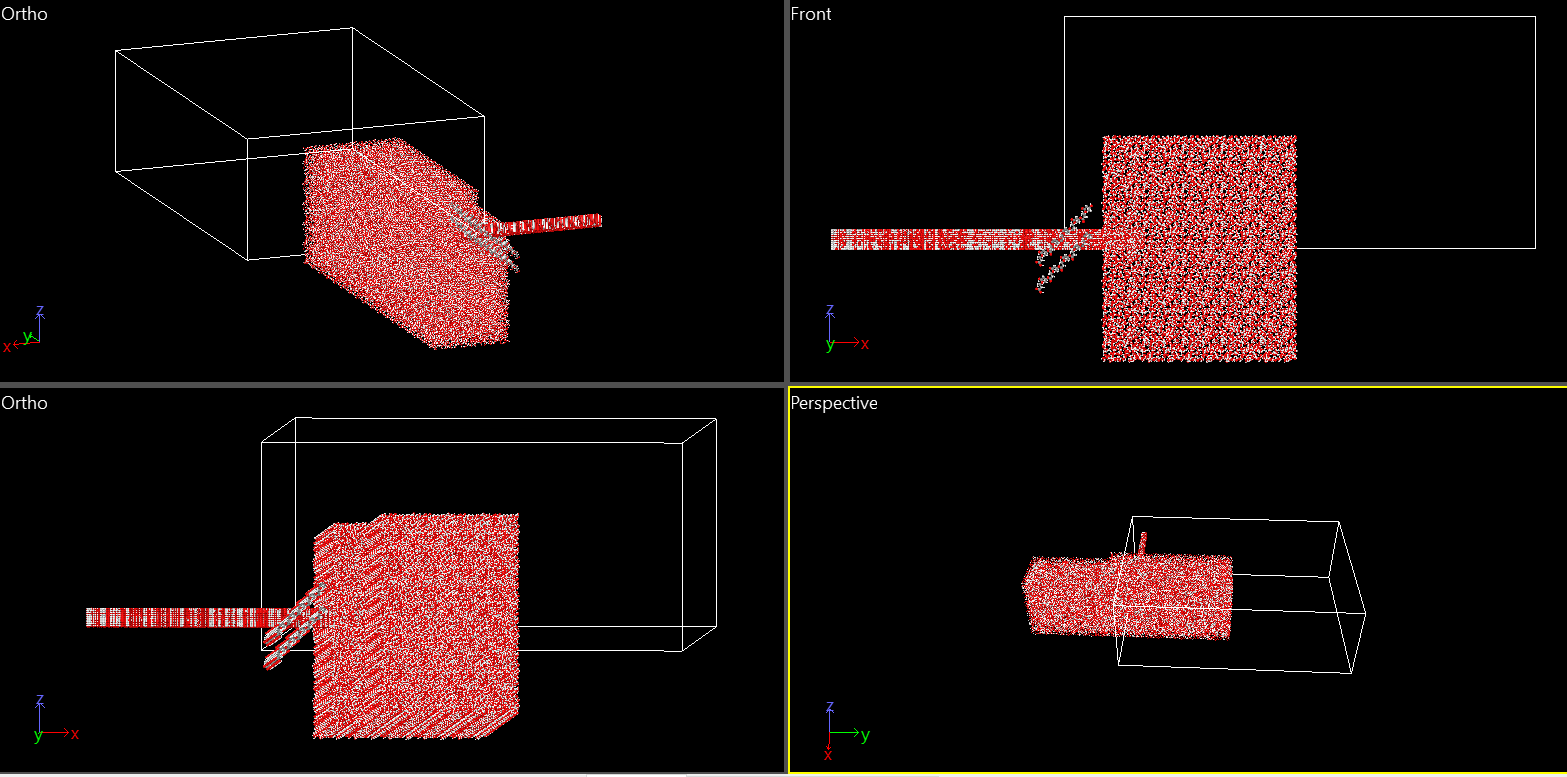

Hmmmm, the weird box size error has occured again.

Okay - this problem has been sorted. The solution was rather simple in the end! <br>
*Note - all systems generated for MD now use this method of solvating in a buffer*

**Original method:**

- Calculate x,y,z distance of an individual polymer and then calculate the distance of the box using these distances. The system was solvated with a tleap command something like this:
  
          solvatebox system TIP3PBOX x, y, z <br>

- However, this is very situational based on the polymers being solvated and requires a lot of fiddling around in the base code.


**New method:**
- The original method was used as the tleap commands I knew to solvate at the time only solvated a cube. But there is a much better, simpler command that takes a system and adds a bufer in all directions.

          solvatebox system TIP3PBOX 10.0

- This yields a result that looks like this:
  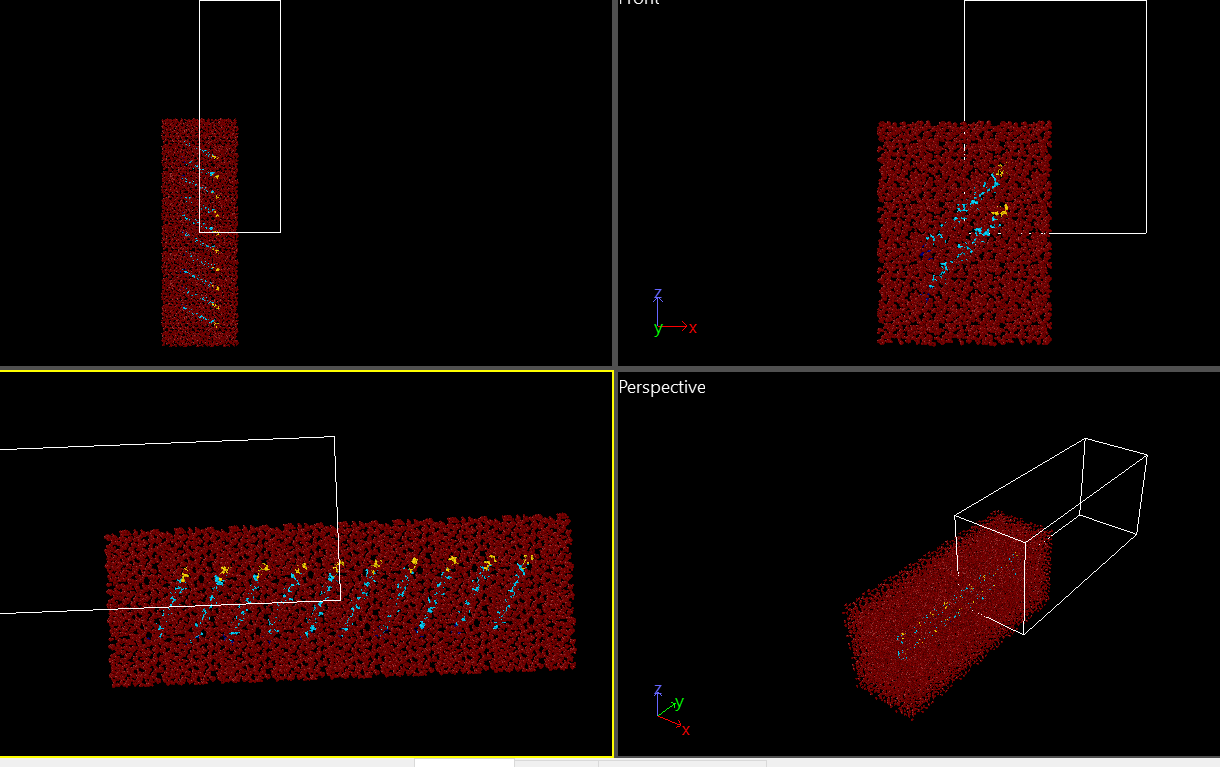

Now we have a system that is usable!!